Imports

In [1]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

AGENT_path = Path().absolute() / f'logReg-agent.pkl'

Loading Agent

In [2]:
try:
  model = joblib.load( AGENT_path )
except FileNotFoundError:
  model = LogisticRegression(random_state=0)

Loading And Parsing Market Data

In [3]:
data = yf.download('^GSPC', interval='1m', period="7d")

[*********************100%***********************]  1 of 1 completed


Modifying Data

In [4]:
# Calculate RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
data['RSI'] = 100 - (100 / (1 + avg_gain / avg_loss))

# Calculate high-low range
high_low_range = data['Close'].rolling(14).max() - data['Close'].rolling(14).min()

# Calculate Stochastic RSI
data['Stoch RSI'] = ((data['RSI'] - data['Close']).rolling(14).min()) / high_low_range

# Specify where agent should take action (buy or sell) == 1, do nothing == 0
data['Action'] = 0
data.loc[ ( data['RSI'] <= 20 ) | ( data['RSI'] >= 80), 'Action' ] = 1

data.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,Stoch RSI,Action
Datetime,,,,,,,,,
2023-01-18 09:30:00-05:00,4002.250000,4005.750000,4002.250000,4005.750000,4005.750000,0,NaN,NaN,0
2023-01-18 09:31:00-05:00,4005.830078,4007.620117,4004.280029,4004.469971,4004.469971,10934862,NaN,NaN,0
2023-01-18 09:32:00-05:00,4004.469971,4004.939941,4000.699951,4001.139893,4001.139893,9700454,NaN,NaN,0
2023-01-18 09:33:00-05:00,4000.760010,4004.729980,4000.760010,4003.800049,4003.800049,8640264,NaN,NaN,0
2023-01-18 09:34:00-05:00,4003.709961,4006.409912,4003.100098,4005.709961,4005.709961,9526105,NaN,NaN,0


Visualising Data

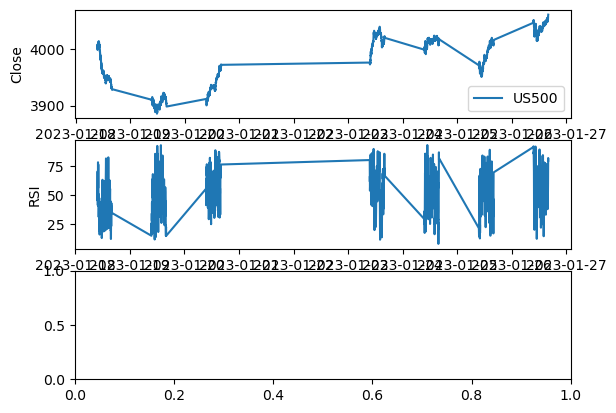

In [5]:
fig, axs = plt.subplots(ncols=1, nrows=3)

sns.lineplot(data=data[['Close']], x=data.index, y="Close", label='US500', ax=axs[0])

sns.lineplot(data=data[['RSI']], x=data.index, y='RSI', ci=None, ax=axs[1])

plt.show()

Train Agent

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data[['Open', 'High', 'Low', 'Close']].values, data['Action'].values, test_size=0.33, random_state=42)

model.fit(X_train, y_train)

model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Save Agent

In [7]:
joblib.dump(model, AGENT_path )

['f:\\AiQuant\\models\\logReg-agent.pkl']